In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


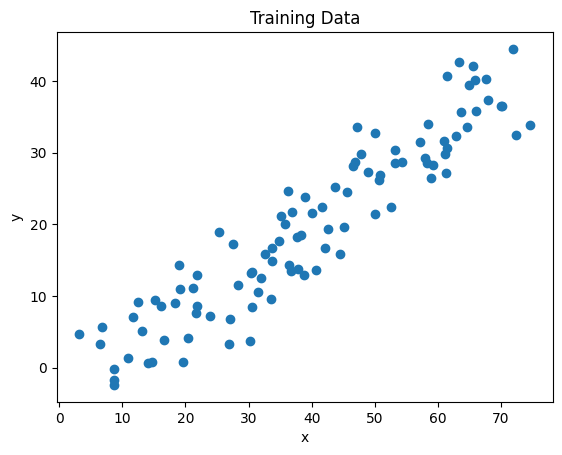

In [2]:
np.random.seed(1)

# dataset generation
x = np.linspace(10, 70, 100)
y = np.linspace(0, 40, 100)
# noise
x += np.random.uniform(-8, 8, 100)
y += np.random.uniform(-5, 5, 100)
n = len(x)

# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [3]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

learning_rate = 0.01
training_epochs = 2000

y_pred = tf.add(tf.multiply(X, W), b)
 
# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)
 
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
# Global Variables Initializer
init = tf.global_variables_initializer()

In [4]:
# Tensorflow Session
with tf.Session() as sess:
     
    # Initializing the Variables
    sess.run(init)
     
    # Iterating through all the epochs
    for epoch in range(training_epochs):
         
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
         
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 18.129652 W = 0.5932537 b = 0.43755576
Epoch 100 : cost = 17.786604 W = 0.5960338 b = 0.24521315
Epoch 150 : cost = 17.47127 W = 0.5986597 b = 0.06354868
Epoch 200 : cost = 17.181147 W = 0.6011398 b = -0.10803079
Epoch 250 : cost = 16.914001 W = 0.6034821 b = -0.27008536
Epoch 300 : cost = 16.667849 W = 0.60569453 b = -0.4231425
Epoch 350 : cost = 16.44083 W = 0.6077841 b = -0.56770384
Epoch 400 : cost = 16.231293 W = 0.6097576 b = -0.7042384
Epoch 450 : cost = 16.037745 W = 0.6116216 b = -0.83319753
Epoch 500 : cost = 15.858826 W = 0.61338216 b = -0.9549973
Epoch 550 : cost = 15.6933155 W = 0.61504495 b = -1.0700336
Epoch 600 : cost = 15.540088 W = 0.61661536 b = -1.1786807
Epoch 650 : cost = 15.398117 W = 0.6180986 b = -1.2812989
Epoch 700 : cost = 15.266498 W = 0.6194996 b = -1.3782233
Epoch 750 : cost = 15.144384 W = 0.62082267 b = -1.4697574
Epoch 800 : cost = 15.031013 W = 0.6220723 b = -1.5562094
Epoch 850 : cost = 14.925676 W = 0.6232525 b = -1.6378639
Epoch 9

In [5]:
# Predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 13.757278 Weight = 0.6379344 bias = -2.653603 



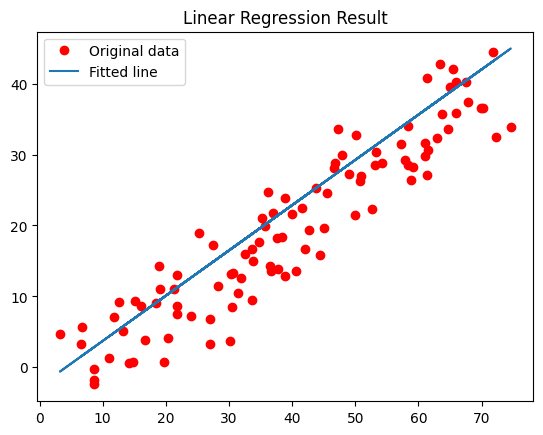

In [6]:
# Plot
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

In [7]:
# regression metrics
print('mean_absolute_error :', mean_absolute_error(y, predictions))
print('mean_squared_error :', mean_squared_error(y, predictions))
print('r2_score :', r2_score(y, predictions))

mean_absolute_error : 4.347637569757082
mean_squared_error : 27.514556139143465
r2_score : 0.8109750517371515
